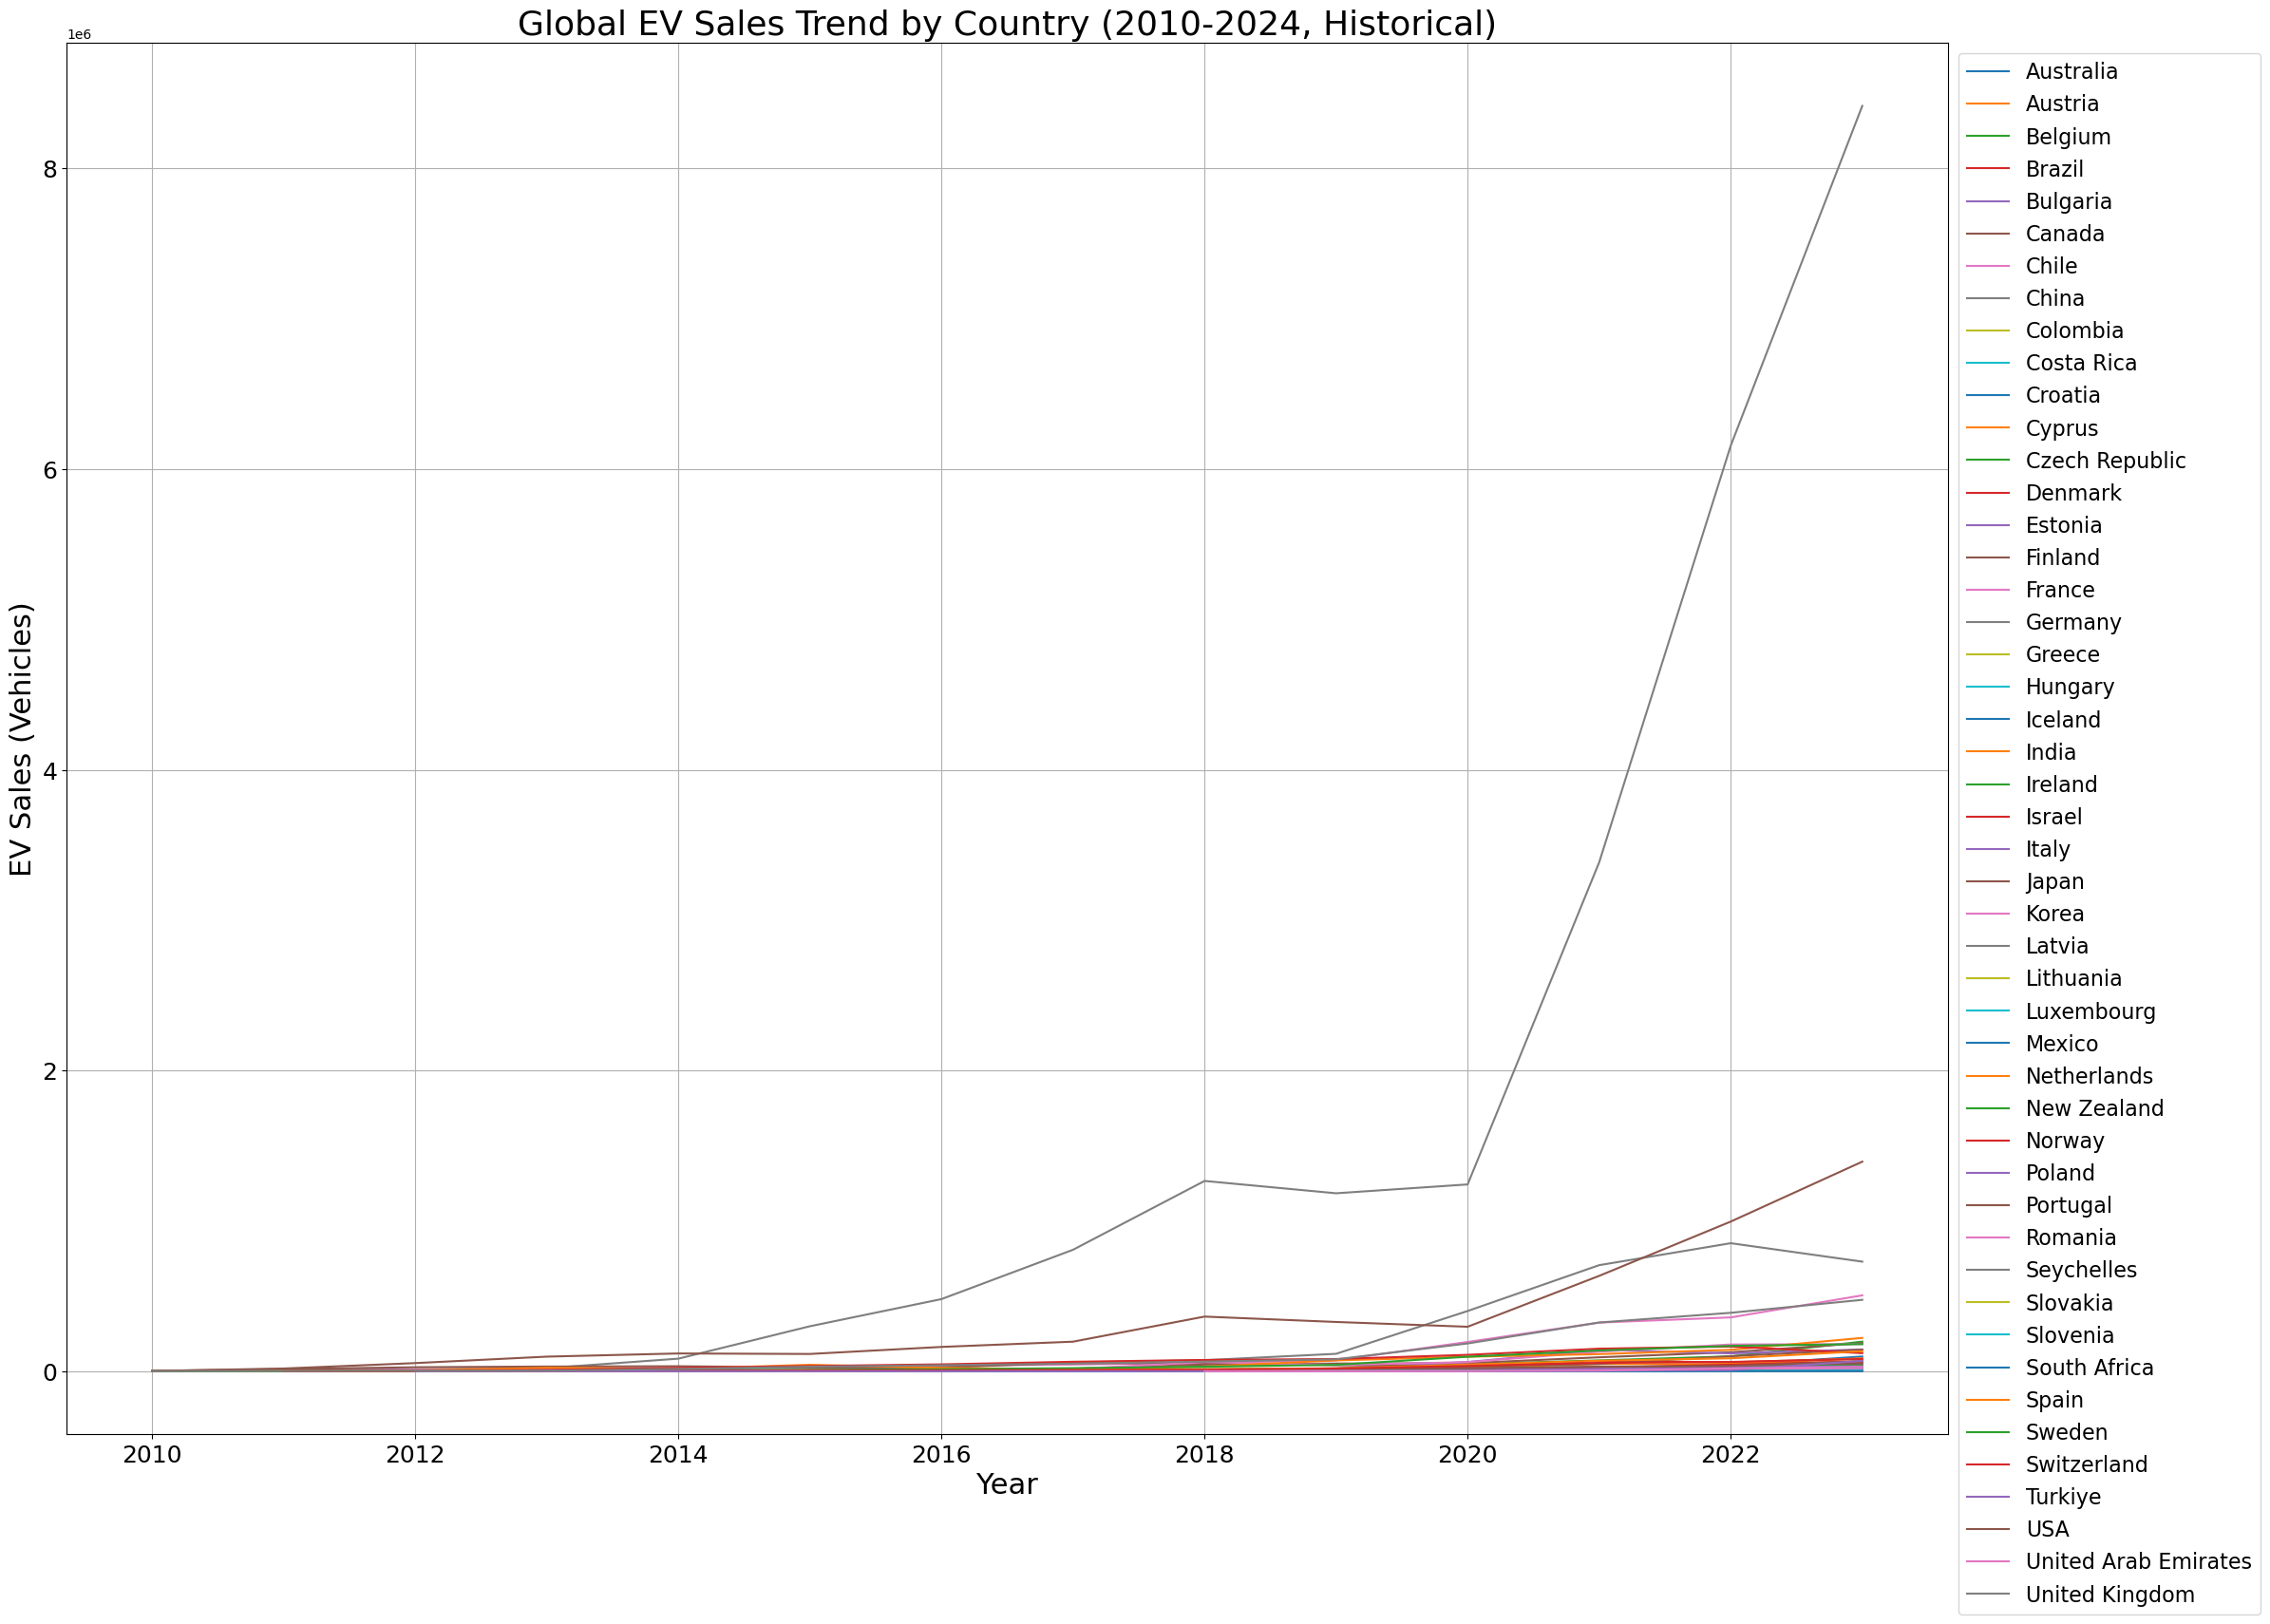

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IEA Global EV Data 2024.csv')
df = df[df['category'] == 'Historical']
df = df[(df['parameter'] == 'EV sales') & (df['unit'] == 'Vehicles')]
df = df[(df['year'] >= 2010) & (df['year'] <= 2024)]
pivot = df.pivot_table(index='year', columns='region', values='value', aggfunc='sum')


exclude_regions = ['World', 'Europe', 'Rest of the world','EU27']
country_columns = [col for col in pivot.columns if col not in exclude_regions]
pivot_countries = pivot[country_columns]

plt.figure(figsize=(24, 18))
for country in pivot_countries.columns:
    plt.plot(pivot_countries.index, pivot_countries[country], label=country)

plt.xlabel('Year', fontsize=22)
plt.ylabel('EV Sales (Vehicles)', fontsize=22)
plt.title('Global EV Sales Trend by Country (2010-2024, Historical)', fontsize=26)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.grid(True)
plt.savefig('global_ev_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()

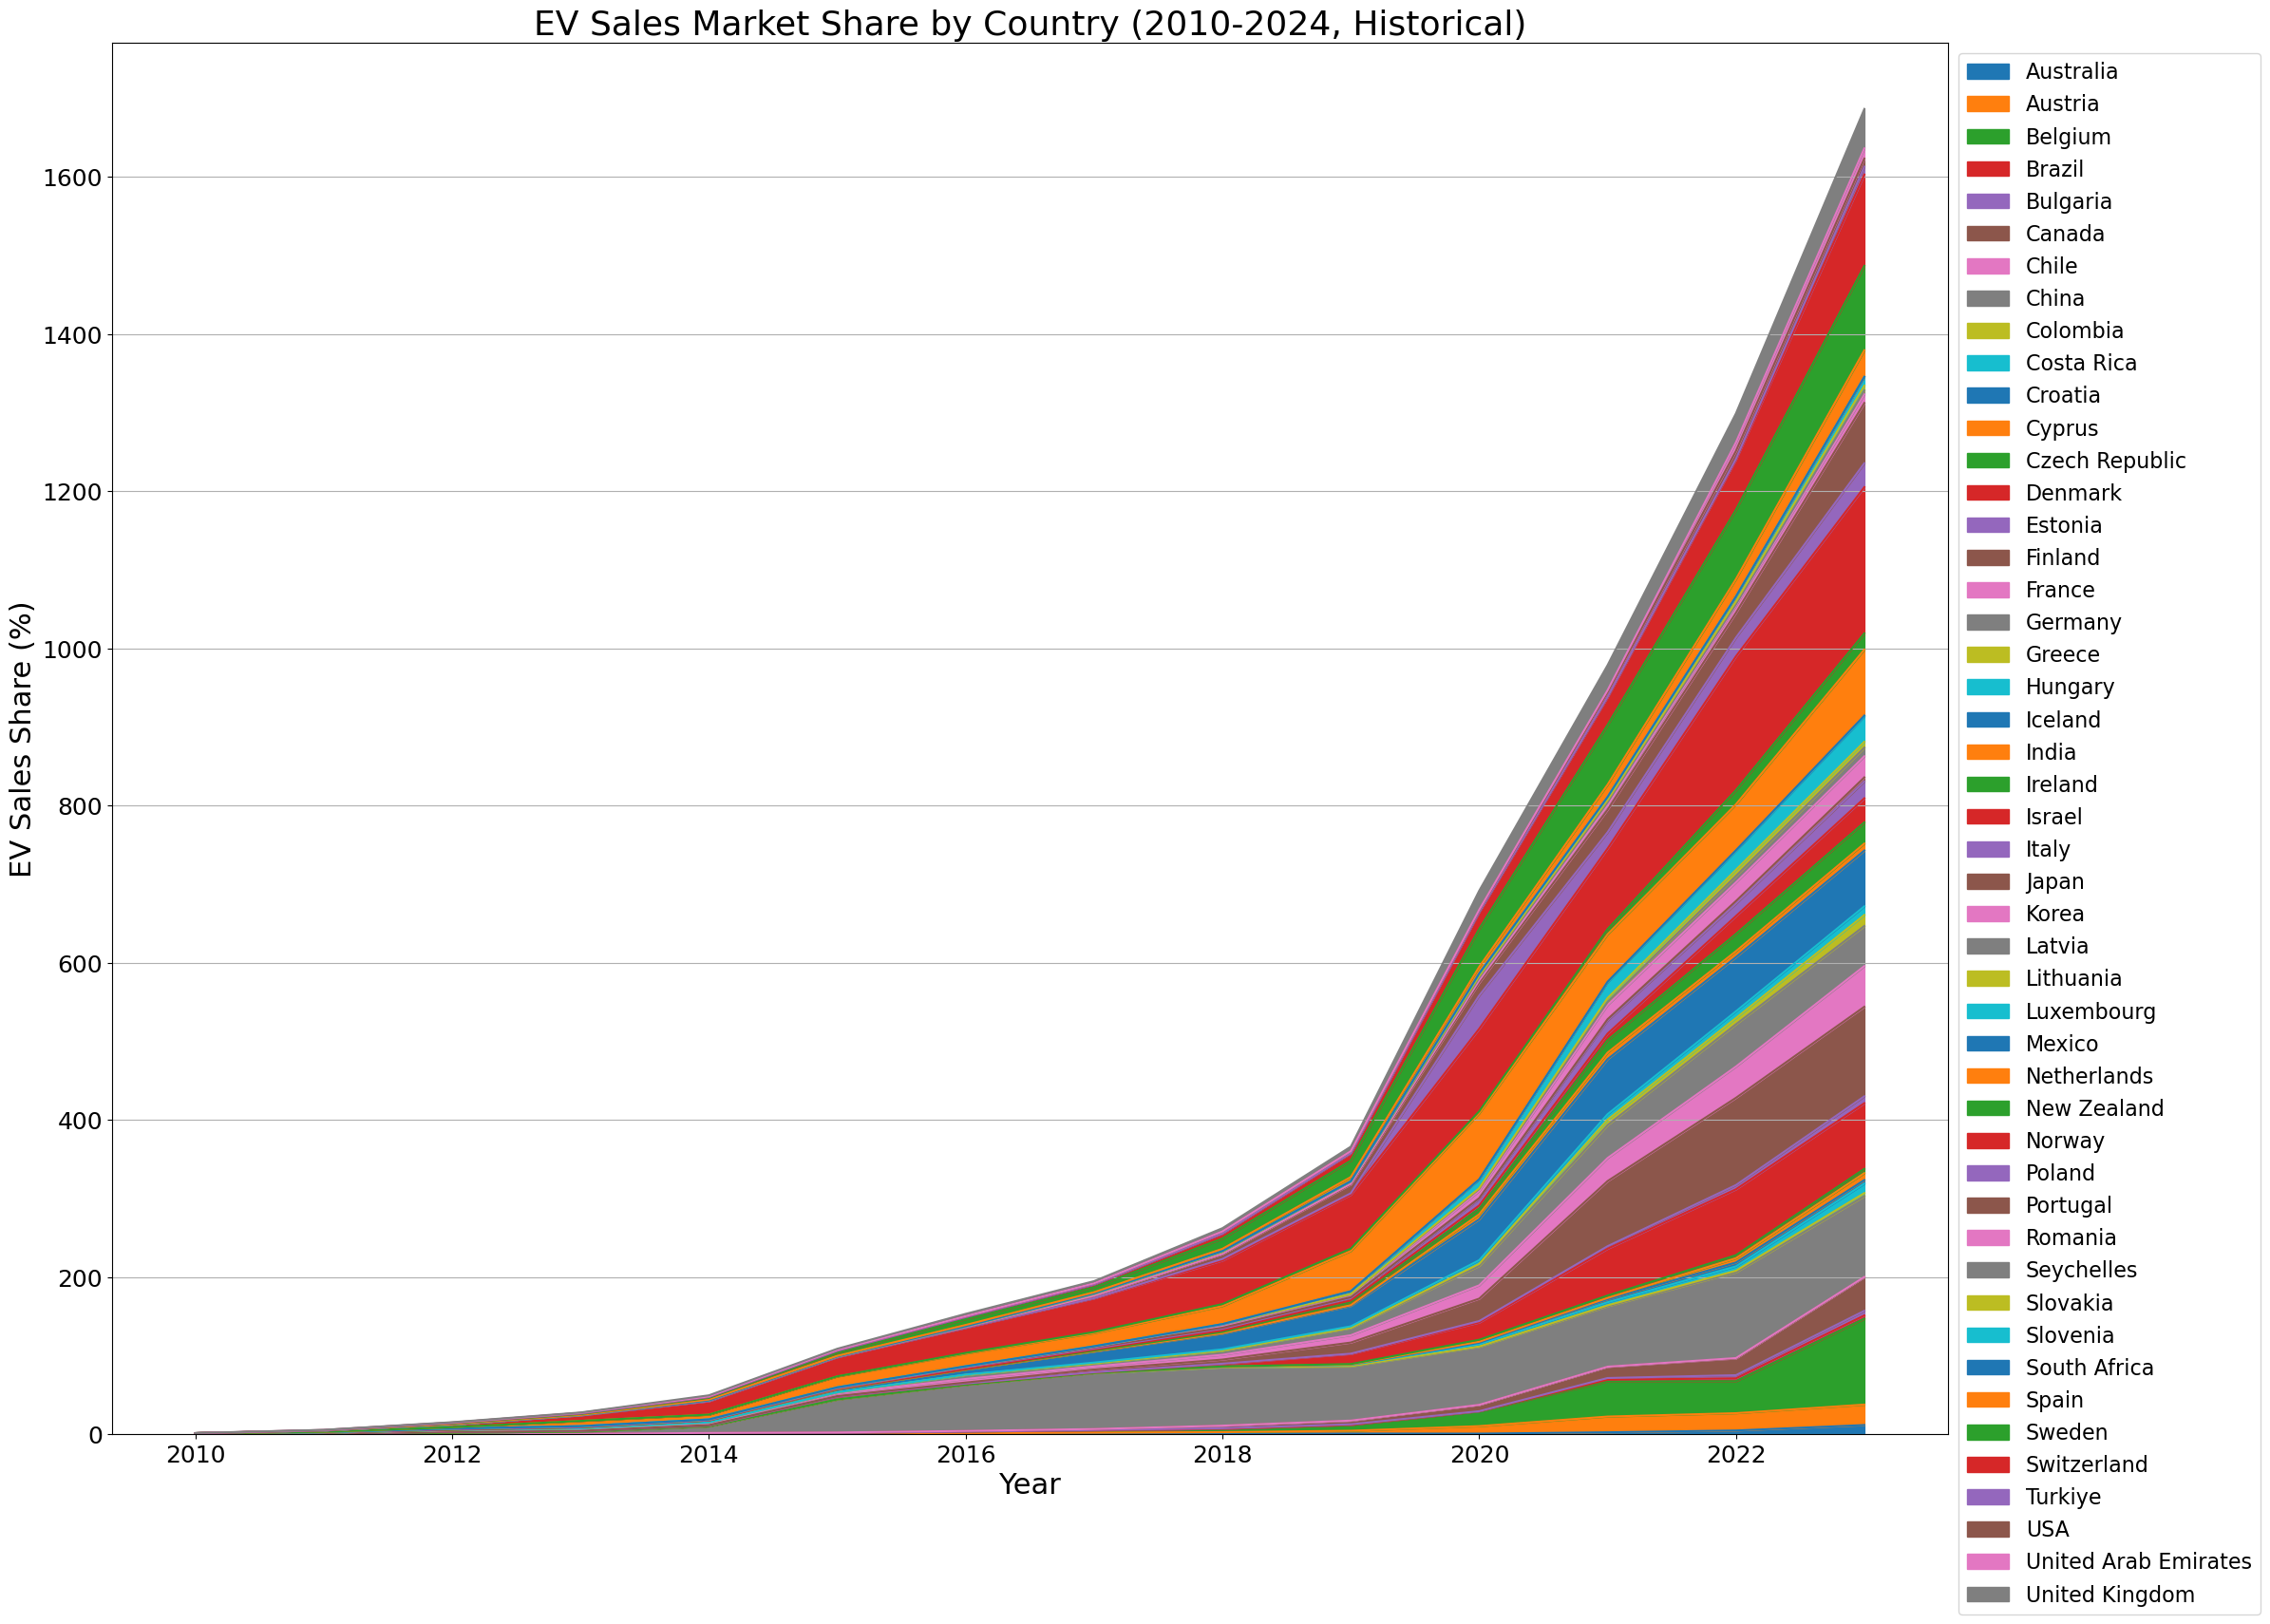

In [2]:
df = pd.read_csv('IEA Global EV Data 2024.csv')
df = df[df['category'] == 'Historical']
df_share = df[(df['parameter'] == 'EV sales share') & (df['unit'] == 'percent')]
df_share = df_share[(df_share['year'] >= 2010) & (df_share['year'] <= 2024)]
exclude_regions = ['World', 'Europe', 'Rest of the world','EU27']
df_share = df_share[~df_share['region'].isin(exclude_regions)]
pivot_share = df_share.pivot_table(index='year', columns='region', values='value', aggfunc='sum')
plt.figure(figsize=(24, 18))
pivot_share.plot.area(ax=plt.gca(), stacked=True)

plt.xlabel('Year', fontsize=22)
plt.ylabel('EV Sales Share (%)', fontsize=22)
plt.title('EV Sales Market Share by Country (2010-2024, Historical)', fontsize=26)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.grid(True, axis='y')
plt.savefig('global_ev_sales_share_stacked_area.png', dpi=300, bbox_inches='tight')
plt.show()

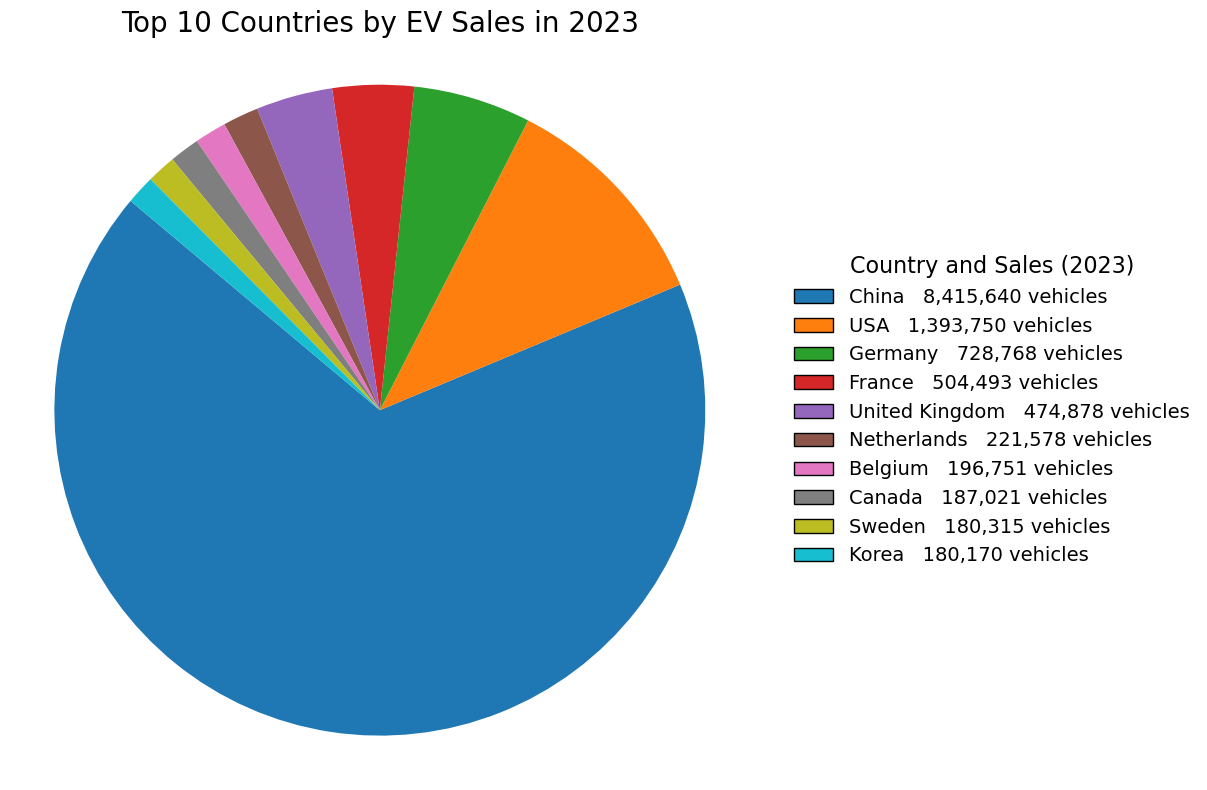

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


year = 2023 #change here to get different year



df = pd.read_csv('IEA Global EV Data 2024.csv')
df_hist = df[df['category'] == 'Historical']
df_sales = df_hist[(df_hist['parameter'] == 'EV sales') & (df_hist['unit'] == 'Vehicles')]
exclude_regions = ['World', 'Europe', 'Rest of the world','EU27']
df_sales = df_sales[~df_sales['region'].isin(exclude_regions)]
df_sales_year = df_sales[df_sales['year'] == year]
df_top10 = df_sales_year.groupby('region', as_index=False)['value'].sum().sort_values('value', ascending=False).head(10)
values = df_top10['value']
labels = df_top10['region']
fig, ax = plt.subplots(figsize=(12, 8))
wedges, _ = ax.pie(values, startangle=140, radius=1.1, labels=None)
legend_elements = [
    Patch(facecolor=wedges[i].get_facecolor(), edgecolor='k')
    for i in range(len(labels))
]
legend_labels = [
    f"{labels.iloc[i]}   {int(values.iloc[i]):,} vehicles"
    for i in range(len(labels))
]
ax.legend(
    legend_elements,
    legend_labels,
    title=f"Country and Sales ({year})",
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    fontsize=14,
    title_fontsize=16,
    frameon=False,
    borderaxespad=0
)

plt.title(f'Top 10 Countries by EV Sales in {year}', fontsize=20)
plt.tight_layout()
plt.savefig(f'ev_sales_top10_pie_{year}_rightlegend.png', dpi=300, bbox_inches='tight')
plt.show()